In [1]:
import os
os.makedirs('charts', exist_ok=True)

In [2]:
import pandas as pd
import numpy as np

In [5]:
df = pd.read_csv('../data/Bank_Personal_Loan_Modelling.csv')
df.head()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1


In [6]:
df.shape
df.columns
df.info()
df.isnull().sum()
df.describe()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ID                  5000 non-null   int64  
 1   Age                 5000 non-null   int64  
 2   Experience          5000 non-null   int64  
 3   Income              5000 non-null   int64  
 4   ZIP Code            5000 non-null   int64  
 5   Family              5000 non-null   int64  
 6   CCAvg               5000 non-null   float64
 7   Education           5000 non-null   int64  
 8   Mortgage            5000 non-null   int64  
 9   Personal Loan       5000 non-null   int64  
 10  Securities Account  5000 non-null   int64  
 11  CD Account          5000 non-null   int64  
 12  Online              5000 non-null   int64  
 13  CreditCard          5000 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 547.0 KB


,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.00000,5000.000000,5000.000000
mean,2500.500000,45.338400,20.104600,73.774200,93152.503000,2.396400,1.937938,1.881000,56.498800,0.096000,0.104400,0.06040,0.596800,0.294000
std,1443.520003,11.463166,11.467954,46.033729,2121.852197,1.147663,1.747659,0.839869,101.713802,0.294621,0.305809,0.23825,0.490589,0.455637
min,1.000000,23.000000,-3.000000,8.000000,9307.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
25%,1250.750000,35.000000,10.000000,39.000000,91911.000000,1.000000,0.700000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
50%,2500.500000,45.000000,20.000000,64.000000,93437.000000,2.000000,1.500000,2.000000,0.000000,0.000000,0.000000,0.00000,1.000000,0.000000
75%,3750.250000,55.000000,30.000000,98.000000,94608.000000,3.000000,2.500000,3.000000,101.000000,0.000000,0.000000,0.00000,1.000000,1.000000
max,5000.000000,67.000000,43.000000,224.000000,96651.000000,4.000000,10.000000,3.000000,635.000000,1.000000,1.000000,1.00000,1.000000,1.000000


In [7]:
df['Personal Loan'].value_counts(normalize = True)

Personal Loan
0    0.904
1    0.096
Name: proportion, dtype: float64

In [8]:
df[df['Experience']<0]

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
89,90,25,-1,113,94303,4,2.30,3,0,0,0,0,0,1
226,227,24,-1,39,94085,2,1.70,2,0,0,0,0,0,0
315,316,24,-2,51,90630,3,0.30,3,0,0,0,0,1,0
451,452,28,-2,48,94132,2,1.75,3,89,0,0,0,1,0
524,525,24,-1,75,93014,4,0.20,1,0,0,0,0,1,0
536,537,25,-1,43,92173,3,2.40,2,176,0,0,0,1,0
540,541,25,-1,109,94010,4,2.30,3,314,0,0,0,1,0
576,577,25,-1,48,92870,3,0.30,3,0,0,0,0,0,1
583,584,24,-1,38,95045,2,1.70,2,0,0,0,0,1,0
597,598,24,-2,125,92835,2,7.20,1,0,0,1,0,0,1


In [ ]:
# Remove the negative experiences 

In [9]:
df= df[df['Experience']>=0]
df['Experience'].min()

0

In [10]:
df.describe()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
count,4948.000000,4948.000000,4948.000000,4948.000000,4948.000000,4948.000000,4948.000000,4948.000000,4948.000000,4948.000000,4948.000000,4948.000000,4948.000000,4948.000000
mean,2501.268795,45.557195,20.331043,73.814470,93151.573363,2.391471,1.935926,1.878941,56.634398,0.097009,0.104285,0.061035,0.597009,0.294058
std,1443.277676,11.320735,11.311973,46.112596,2126.669017,1.148444,1.747694,0.839745,101.828885,0.296000,0.305660,0.239418,0.490549,0.455664
min,1.000000,24.000000,0.000000,8.000000,9307.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1254.750000,36.000000,10.750000,39.000000,91911.000000,1.000000,0.700000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,2497.500000,46.000000,20.000000,64.000000,93437.000000,2.000000,1.500000,2.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
75%,3750.250000,55.000000,30.000000,98.000000,94608.000000,3.000000,2.600000,3.000000,101.000000,0.000000,0.000000,0.000000,1.000000,1.000000
max,5000.000000,67.000000,43.000000,224.000000,96651.000000,4.000000,10.000000,3.000000,635.000000,1.000000,1.000000,1.000000,1.000000,1.000000


# Outlier Detection by Age, Income, CCAvg(Credit Card Average Spending/Month), Mortgage

In [11]:
df[['Age','Income', 'CCAvg', 'Mortgage']].describe()

,Age,Income,CCAvg,Mortgage
count,4948.000000,4948.000000,4948.000000,4948.000000
mean,45.557195,73.814470,1.935926,56.634398
std,11.320735,46.112596,1.747694,101.828885
min,24.000000,8.000000,0.000000,0.000000
25%,36.000000,39.000000,0.700000,0.000000
50%,46.000000,64.000000,1.500000,0.000000
75%,55.000000,98.000000,2.600000,101.000000
max,67.000000,224.000000,10.000000,635.000000


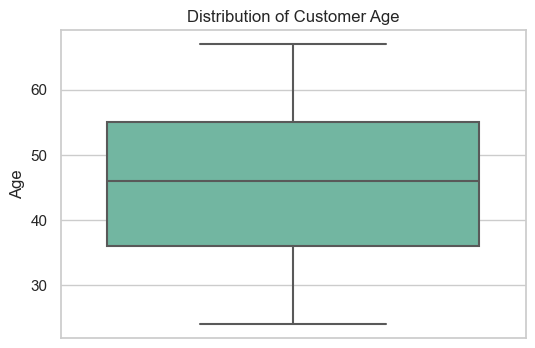

In [18]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style = "whitegrid")

plt.figure(figsize = (6,4))
sns.boxplot(y= df['Age'], palette ='Set2')
plt.title('Distribution of Customer Age')
plt.ylabel('Age')
plt.savefig('../charts/age_distribution_outliers.png', bbox_inches='tight')
plt.show()


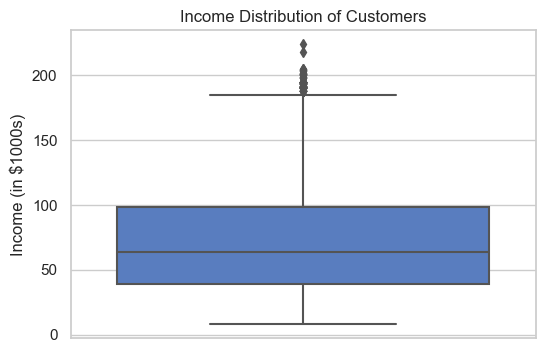

In [27]:
# Income Outlier

sns.set(style = "whitegrid")

plt.figure(figsize =(6,4))
sns.boxplot(y= df['Income'], palette = 'muted')
plt.title('Income Distribution of Customers')   
plt.ylabel('Income (in $1000s)')                  

plt.savefig('../charts/income_distribution_outliers.png', bbox_inches='tight')
plt.show()

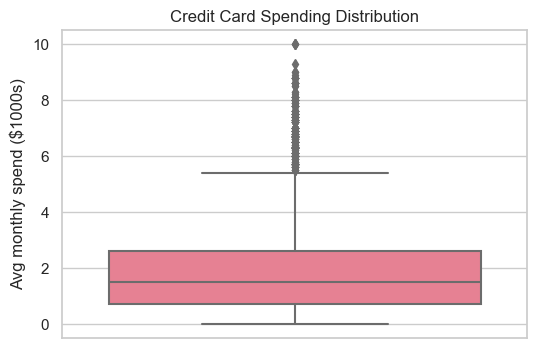

In [41]:
# CCAvg Outlier

sns.set(style = "whitegrid")

plt.figure(figsize =(6,4))
sns.boxplot(y= df['CCAvg'], palette = 'husl')
plt.title('Credit Card Spending Distribution')   
plt.ylabel('Avg monthly spend ($1000s)')                  

plt.savefig('../charts/credit_card_spend_distribution.png', bbox_inches='tight')
plt.show()

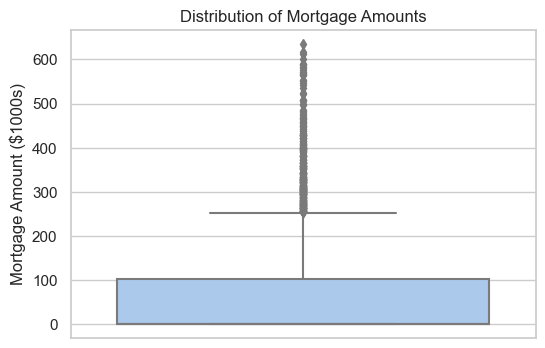

In [42]:
sns.set(style = "whitegrid")

plt.figure(figsize =(6,4))
sns.boxplot(y= df['Mortgage'], palette = 'pastel')
plt.title('Distribution of Mortgage Amounts')   
plt.ylabel('Mortgage Amount ($1000s)')                  

plt.savefig('../charts/mortgage_amount_distribution.png', bbox_inches='tight')
plt.show()

# Correlation Analysis 

In [45]:

numeric_cols = df.drop(columns = ['ID','ZIP Code']).select_dtypes(include= 'number')


In [46]:
corr_matrix = numeric_cols.corr()

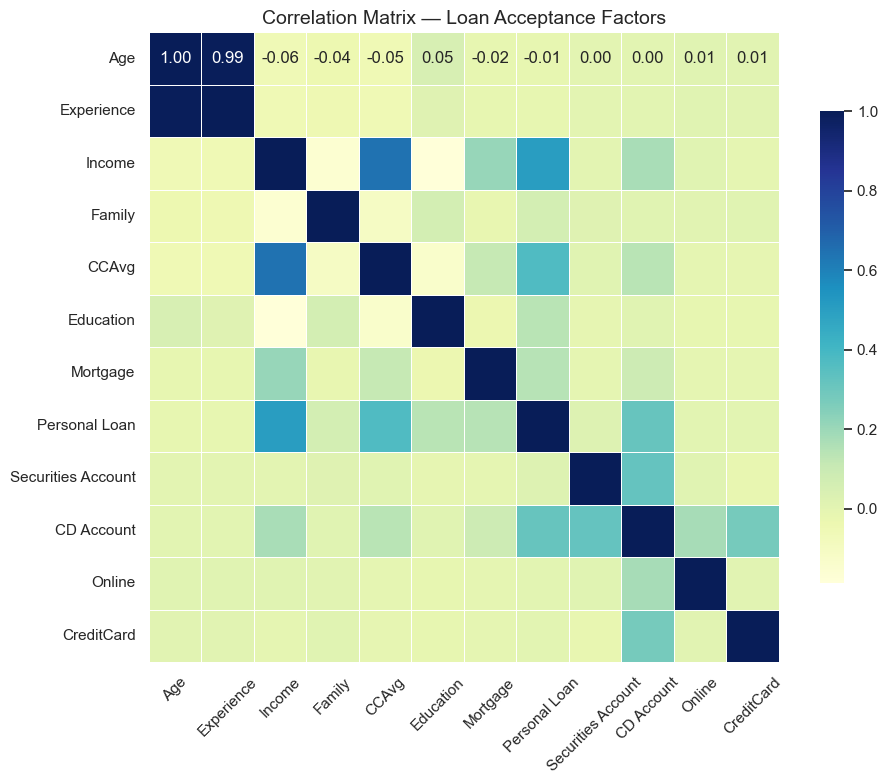

In [49]:
plt.figure(figsize=(10, 8))
sns.heatmap(
    corr_matrix, 
    annot=True, 
    fmt=".2f", 
    cmap='YlGnBu', 
    linewidths=0.5, 
    square=True, 
    cbar_kws={"shrink": 0.75}
)
plt.title('Correlation Matrix — Loan Acceptance Factors', fontsize=14)
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.tight_layout()
plt.savefig('../charts/correlation_heatmap.png')  
plt.show()


# Target based Analysis — Income vs Loan Status
personal loan =0 (no loan) - group 1
personal loan =1 (loan) - group 2

In [51]:
income_by_loan = df.groupby('Personal Loan')['Income'].mean().reset_index()

In [56]:
income_by_loan.columns = ['Personal Loan', 'Average Income($1000s)']

In [57]:
income_by_loan.columns


Index(['Personal Loan', 'Average Income($1000s)'], dtype='object')

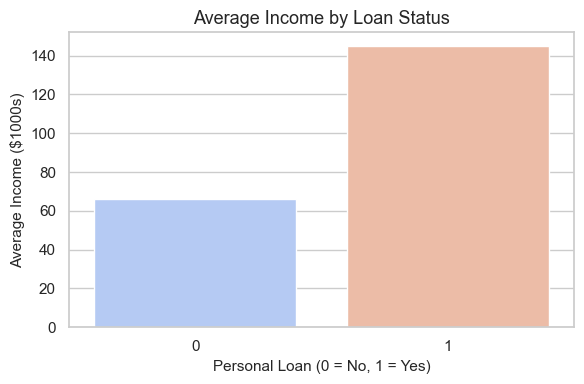

In [58]:
plt.figure(figsize=(6, 4))
sns.barplot(
    x='Personal Loan',
    y='Average Income($1000s)',
    data=income_by_loan,
    palette='coolwarm'
)
plt.title('Average Income by Loan Status', fontsize=13)
plt.xlabel('Personal Loan (0 = No, 1 = Yes)', fontsize=11)
plt.ylabel('Average Income ($1000s)', fontsize=11)
plt.tight_layout()
plt.savefig('../charts/income_by_loan_status.png')
plt.show()


# Average Age by Loan Status loan vs age 

In [61]:
age_by_loan = df.groupby('Personal Loan')['Age'].mean(). reset_index()


In [62]:
age_by_loan.columns = ['Personal Loan', 'Average Age']

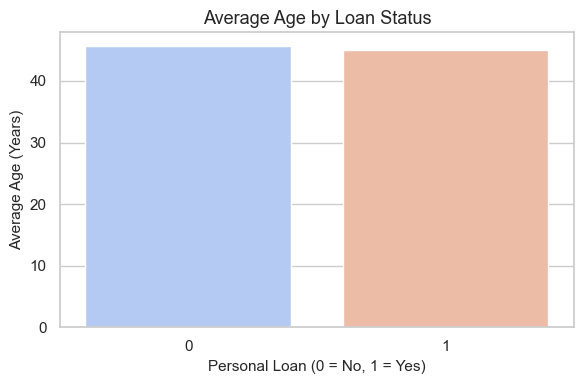

In [63]:
plt.figure(figsize=(6, 4))
sns.barplot(
    x='Personal Loan',
    y='Average Age',
    data=age_by_loan,
    palette='coolwarm'
)

plt.title('Average Age by Loan Status', fontsize=13)
plt.xlabel('Personal Loan (0 = No, 1 = Yes)', fontsize=11)
plt.ylabel('Average Age (Years)', fontsize=11)
plt.tight_layout()
plt.savefig('../charts/age_by_loan_status.png')
plt.show()


In [64]:
education_by_loan = df.groupby('Personal Loan')['Education'].mean().reset_index()
education_by_loan.rename(columns={'Education': 'Average Education Level'}, inplace=True)
education_by_loan


,Personal Loan,Average Education Level
0,0,1.840868
1,1,2.233333


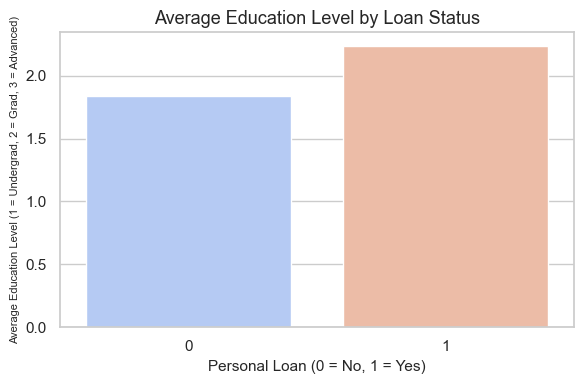

In [66]:
plt.figure(figsize=(6, 4))
sns.barplot(
    x='Personal Loan',
    y='Average Education Level',
    data=education_by_loan,
    palette='coolwarm'
)

plt.title('Average Education Level by Loan Status', fontsize=13)
plt.xlabel('Personal Loan (0 = No, 1 = Yes)', fontsize=11)
plt.ylabel('Average Education Level (1 = Undergrad, 2 = Grad, 3 = Advanced)', fontsize=8)
plt.tight_layout()
plt.savefig('../charts/education_by_loan_status.png')
plt.show()


# Credit Card Spending vs Loan Statu

In [68]:

ccavg_by_loan = df.groupby('Personal Loan')['CCAvg'].mean().reset_index()
ccavg_by_loan.rename(columns={'CCAvg': 'Average Monthly Credit Card Spending ($000s)'}, inplace=True)
ccavg_by_loan

,Personal Loan,Average Monthly Credit Card Spending ($000s)
0,0,1.724349
1,1,3.905354


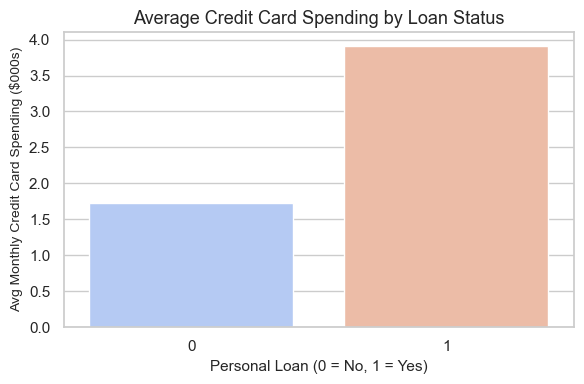

In [70]:
plt.figure(figsize=(6, 4))
sns.barplot(
    x='Personal Loan',
    y='Average Monthly Credit Card Spending ($000s)',
    data=ccavg_by_loan,
    palette='coolwarm'
)

plt.title('Average Credit Card Spending by Loan Status', fontsize=13)
plt.xlabel('Personal Loan (0 = No, 1 = Yes)', fontsize=11)
plt.ylabel('Avg Monthly Credit Card Spending ($000s)', fontsize=10)

plt.tight_layout()
plt.savefig('../charts/ccavg_by_loan_status.png')
plt.show()
